In [2]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)


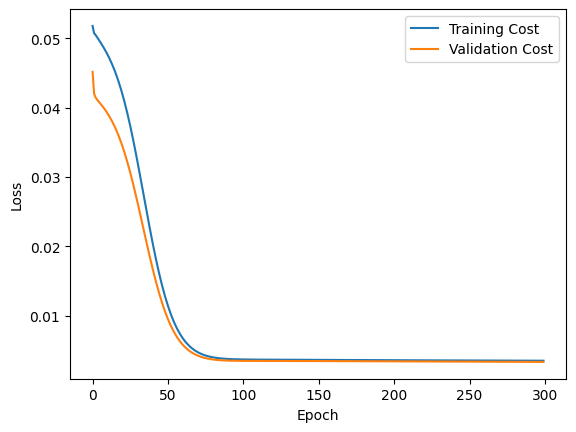

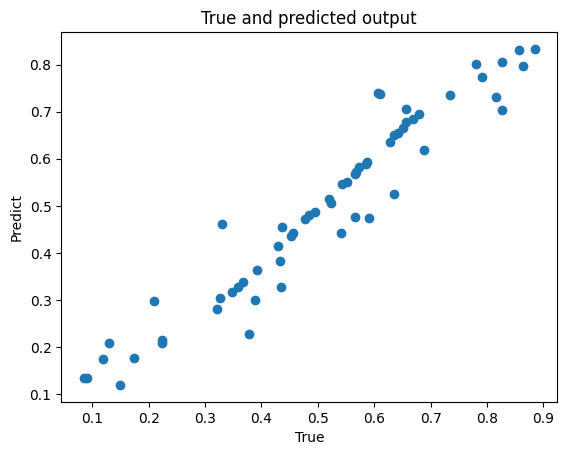

In [96]:
import matplotlib.pyplot as plt

#sigmoid activation function
def sigmoid_derivative(x):
  return x * (1-x)

#initialize weights and biases randomly between (-1, 0) and zeros, respectively
w1 = np.random.uniform(-1, 1, size=(3, 2))
b1 = np.zeros((3, 1))
w2 = np.random.uniform(-1, 1, size=(1, 3))
b2 = np.zeros((1, 1))

#forward propagation
def forward_propagation(x, w1, b1, w2, b2):
    z1 = np.dot(w1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2
#backward propagation
def backward_prop(x, y, w1, b1, w2, b2, z1, a1, z2, a2):
    m = x.shape[1]
    dz2 = (a2 - y)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * sigmoid_derivative(a1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2
#update parameters using gradient descent
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2
#training function
def train(x_train, y_train, w1, b1, w2, b2, learning_rate, iterations):
    cost_train_list = []
    cost_valid_list = []
    #update parameters for each sample in training dataset
    for i in range(iterations):
        for j in range(len(x_train)):
            x = np.array(x_train[j]).reshape(2, 1)
            y = np.array(y_train[j]).reshape(1, 1)

            z1, a1, z2, a2 = forward_propagation(x, w1, b1, w2, b2)
            dw1, db1, dw2, db2 = backward_prop(x, y, w1, b1, w2, b2, z1, a1, z2, a2)
            w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
        #compute training and validation costs after each epoch
        cost_train = compute_cost(x_train, y_train, w1, b1, w2, b2)
        cost_valid = compute_cost(x_valid, y_valid, w1, b1, w2, b2)
        cost_train_list.append(cost_train)
        cost_valid_list.append(cost_valid)

    return w1, b1, w2, b2, cost_train_list, cost_valid_list
#cost computation
def compute_cost(x, y, w1, b1, w2, b2):
    m = len(x)
    cost = 0

    for i in range(m):
        x_sample = np.array(x[i]).reshape(2, 1)
        y_sample = np.array(y[i]).reshape(1, 1)
        _, _, _, a2 = forward_propagation(x_sample, w1, b1, w2, b2)
        cost += np.square(y_sample - a2)

    cost = cost / m
    return cost[0][0]
#learning rate and number of iterations
learning_rate = 0.02
iterations = 300
#train the model
w1, b1, w2, b2, cost_train_list, cost_valid_list = train(x_train, y_train, w1, b1, w2, b2, learning_rate, iterations)
#plot training and validation costs
plt.plot(range(iterations), cost_train_list, label="Training Cost")
plt.plot(range(iterations), cost_valid_list, label="Validation Cost")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
#combine training an validation datasets
x_train_valid = x_train + x_valid
y_train_valid = y_train + y_valid
#train the model with combined dataset
w1, b1, w2, b2, _, _ = train(x_train_valid, y_train_valid, w1, b1, w2, b2, learning_rate, iterations)
#predictions on test dataset
y_pred = []
for x_sample in x_test:
    x_sample = np.array(x_sample).reshape(2, 1)
    _, _, _, a2 = forward_propagation(x_sample, w1, b1, w2, b2)
    y_pred.append(a2[0][0])
#scatter plot to show relationship between true values and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True")
plt.ylabel("Predict")
plt.title("True and predicted output")
plt.show()